In [1]:
print('hello')

hello


In [0]:
import glob
import keras
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense,Dropout ,Input, Flatten,Conv2D, Conv2DTranspose, BatchNormalization, Reshape, LeakyReLU, Activation


In [2]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en-IN;q=0.9,en;q=0.8,kn;q=0.7,mr;q=0.6" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-data-sets/29561/37705/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1590584511&Signature=jZRVfwe%2FEMOyKpwuh3XSoyCB0ra1au6XuKgFlqsTftyeQD1F4aqSjfZ0DxAL%2FFT4TWwv4C4nQmGM13tihDg4CG0GwGgXYEEM0pY%2FnF5uCxioYK6mVLXdursYNVWoJ2wzKSN5ugzSvyaJnpoN7YCzxk72U1da8A0TtqrB%2F5hn4MgJWHQxUACPyCa96zL01acMiqgjhvdmbEY905NHfaLAPzlvohYeAhUnfjlfIKLns8s6kY7tvq5MDdN5I1CB54f3byEjx9mdgRyBE8DBMC1C%2Bt5QElb5MG4DEcAePy6VqEpY2YWSS8LhfXD2pkitQHtXOXg9Oc99kKqosiElqDqd3w%3D%3D&response-content-disposition=attachment%3B+filename%3Dceleba-dataset.zip" -c -O 'celeba-dataset.zip'

--2020-05-24 13:38:44--  https://storage.googleapis.com/kaggle-data-sets/29561/37705/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1590584511&Signature=jZRVfwe%2FEMOyKpwuh3XSoyCB0ra1au6XuKgFlqsTftyeQD1F4aqSjfZ0DxAL%2FFT4TWwv4C4nQmGM13tihDg4CG0GwGgXYEEM0pY%2FnF5uCxioYK6mVLXdursYNVWoJ2wzKSN5ugzSvyaJnpoN7YCzxk72U1da8A0TtqrB%2F5hn4MgJWHQxUACPyCa96zL01acMiqgjhvdmbEY905NHfaLAPzlvohYeAhUnfjlfIKLns8s6kY7tvq5MDdN5I1CB54f3byEjx9mdgRyBE8DBMC1C%2Bt5QElb5MG4DEcAePy6VqEpY2YWSS8LhfXD2pkitQHtXOXg9Oc99kKqosiElqDqd3w%3D%3D&response-content-disposition=attachment%3B+filename%3Dceleba-dataset.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.206.128, 2a00:1450:400c:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.206.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1427750792 (1.3G) [application/zip]
Saving to: ‘celeba-dataset.zip’

celeba-dataset.zip  100%[===================>]   1.33

In [0]:
! unzip celeba-dataset.zip

In [0]:
import os
path_celeb = []
train_path_celeb = "img_align_celeba/img_align_celeba/"
for path in os.listdir(train_path_celeb):
    if '.jpg' in path:
        path_celeb.append(os.path.join(train_path_celeb, path))

In [3]:
path_celeb[0]

'img_align_celeba/img_align_celeba/000926.jpg'

In [0]:
new_path=path_celeb[0:50000]

In [0]:
crop = (30, 55, 150, 175) #croping size for the image so that only the face at centre is obtained
images = [np.array((Image.open(path).crop(crop)).resize((64,64))) for path in new_path]

for i in range(len(images)):
    images[i] = ((images[i] - images[i].min())/(255 - images[i].min()))
    #images[i] = images[i]*2-1  #uncomment this if activation is tanh for generator last layer
    
images = np.array(images) 

In [0]:
train_data=images

<Figure size 720x720 with 0 Axes>

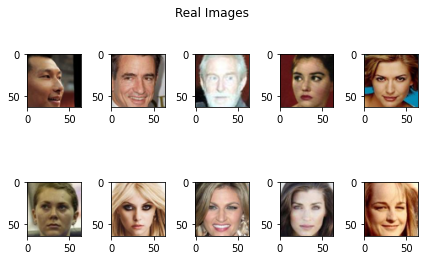

In [7]:
plt.figure(figsize=(10,10))
fig,ax=plt.subplots(2,5)
fig.suptitle("Real Images")
idx=800

for i in range(2):
    for j in range(5):
            ax[i,j].imshow(train_data[idx].reshape(64,64,3))
            #ax[i,j].set_title("Real Image")
            
            idx+=600
            
plt.tight_layout()
plt.show()

In [0]:
X_train = train_data

In [0]:
noise_shape = 100

In [0]:
generator=Sequential()
generator.add(Dense(4*4*512,input_shape=[noise_shape]))
generator.add(Reshape([4,4,512]))
generator.add(Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(3, kernel_size=4, strides=2, padding="same",
                                 activation='sigmoid'))

In [26]:
generator.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8192)              827392    
_________________________________________________________________
reshape_2 (Reshape)          (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 8, 8, 256)         2097408   
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 16, 16, 128)       524416    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 16, 16, 128)      

In [0]:
discriminator=Sequential()
discriminator.add(Conv2D(32, kernel_size=4, strides=2, padding="same",input_shape=[64,64, 3]))
discriminator.add(Conv2D(64, kernel_size=4, strides=2, padding="same"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())
discriminator.add(Conv2D(128, kernel_size=4, strides=2, padding="same"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())
discriminator.add(Conv2D(256, kernel_size=4, strides=2, padding="same"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Flatten())
discriminator.add(Dropout(0.5))
discriminator.add(Dense(1,activation='sigmoid'))

In [28]:
discriminator.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        1568      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        32832     
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 128)         131200    
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 8, 8, 128)        

In [0]:
GAN =Sequential([generator,discriminator])


In [0]:
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
discriminator.trainable = False

In [0]:
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [32]:
GAN.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 64, 64, 3)         3585219   
_________________________________________________________________
sequential_6 (Sequential)    (None, 1)                 695009    
Total params: 4,280,228
Trainable params: 3,584,323
Non-trainable params: 695,905
_________________________________________________________________


In [0]:
epochs = 150  #set epoch according to your training dataset size,i had chosen 50k images hence epochs are high as 300...
batch_size = 128


In [0]:
D_loss=[] #list to collect loss for the discriminator model
G_loss=[] #list to collect loss for generator model

Currently on Epoch 1
	Currently on batch number 0 of 390
	Currently on batch number 100 of 390
	Currently on batch number 200 of 390
	Currently on batch number 300 of 390


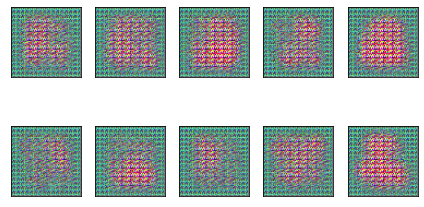

Epoch: 1,  Loss: D_real = 0.000, D_fake = 0.000,  G = 0.000
Currently on Epoch 2
	Currently on batch number 0 of 390
	Currently on batch number 100 of 390
	Currently on batch number 200 of 390
	Currently on batch number 300 of 390
Epoch: 2,  Loss: D_real = 0.001, D_fake = 0.003,  G = 0.852
Currently on Epoch 3
	Currently on batch number 0 of 390
	Currently on batch number 100 of 390
	Currently on batch number 200 of 390
	Currently on batch number 300 of 390
Epoch: 3,  Loss: D_real = 0.003, D_fake = 0.001,  G = 15.258
Currently on Epoch 4
	Currently on batch number 0 of 390
	Currently on batch number 100 of 390
	Currently on batch number 200 of 390
	Currently on batch number 300 of 390
Epoch: 4,  Loss: D_real = 0.000, D_fake = 0.064,  G = 31.864
Currently on Epoch 5
	Currently on batch number 0 of 390
	Currently on batch number 100 of 390
	Currently on batch number 200 of 390
	Currently on batch number 300 of 390
Epoch: 5,  Loss: D_real = 0.004, D_fake = 0.000,  G = 26.537
Currently on 

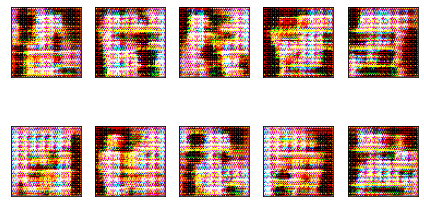

Epoch: 6,  Loss: D_real = 0.108, D_fake = 0.184,  G = 18.558
Currently on Epoch 7
	Currently on batch number 0 of 390
	Currently on batch number 100 of 390
	Currently on batch number 200 of 390
	Currently on batch number 300 of 390
Epoch: 7,  Loss: D_real = 0.000, D_fake = 0.000,  G = 22.290
Currently on Epoch 8
	Currently on batch number 0 of 390
	Currently on batch number 100 of 390
	Currently on batch number 200 of 390
	Currently on batch number 300 of 390
Epoch: 8,  Loss: D_real = 0.000, D_fake = 0.012,  G = 18.091
Currently on Epoch 9
	Currently on batch number 0 of 390
	Currently on batch number 100 of 390
	Currently on batch number 200 of 390
	Currently on batch number 300 of 390
Epoch: 9,  Loss: D_real = 6.421, D_fake = 0.000,  G = 82.194
Currently on Epoch 10
	Currently on batch number 0 of 390
	Currently on batch number 100 of 390
	Currently on batch number 200 of 390
	Currently on batch number 300 of 390
Epoch: 10,  Loss: D_real = 0.000, D_fake = 0.000,  G = 18.448
Currently

KeyboardInterrupt: ignored

In [35]:
 import tensorflow as tf
 for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    
    # For every batch in the dataset
    for i in range(X_train.shape[0]//batch_size):
        if (i)%100 == 0:
          print(f"\tCurrently on batch number {i} of {len(X_train)//batch_size}")
        noise=np.random.uniform(-1,1,size=[batch_size,noise_shape])
        
        gen_image = generator.predict_on_batch(noise)
        
        train_dataset = X_train[i*batch_size:(i+1)*batch_size]
        #train on real image
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = True
        d_loss1 = discriminator.train_on_batch(train_dataset,train_label)
        
        #train on fake image
        train_label=np.zeros(shape=(batch_size,1))
        d_loss2 = discriminator.train_on_batch(gen_image,train_label)
        noise=np.random.uniform(-1,1,size=[batch_size,noise_shape])
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = False
        #train the generator
        g_loss = GAN.train_on_batch(noise, train_label)
        D_loss.append(d_loss1+d_loss2)
        G_loss.append(g_loss)
        
         
    if epoch % 5 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples,100)))
        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow((x_fake[k].reshape(64,64,3)))

            plt.xticks([])
            plt.yticks([])

        
        plt.tight_layout()
        plt.show()
    print('Epoch: %d,  Loss: D_real = %.3f, D_fake = %.3f,  G = %.3f' %   (epoch+1, d_loss1, d_loss2, g_loss))        
print('Training is complete')


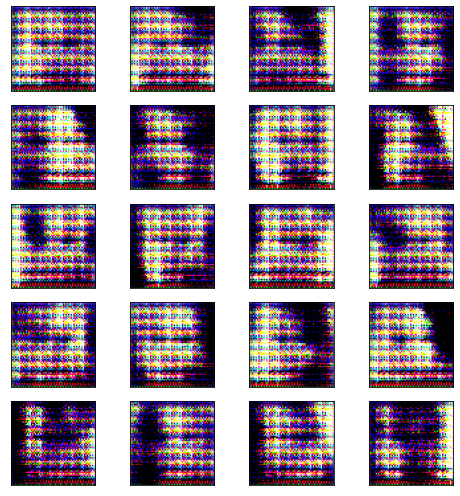

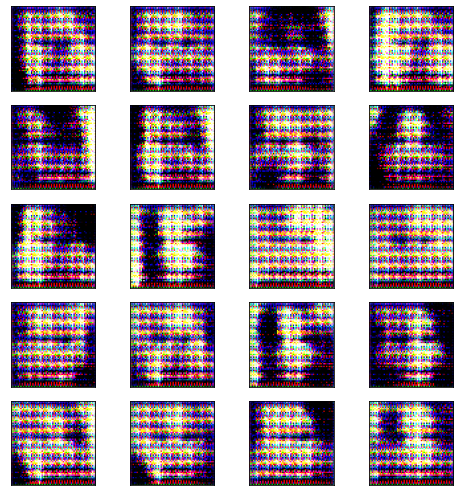

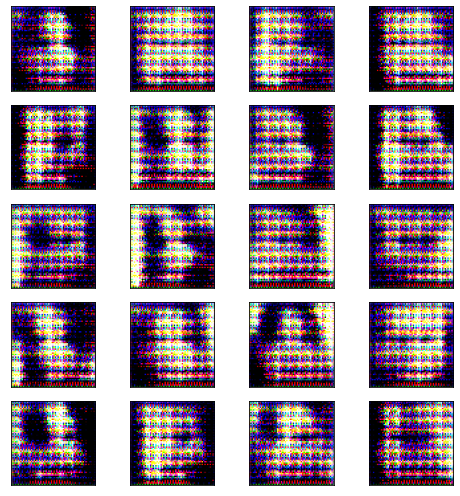

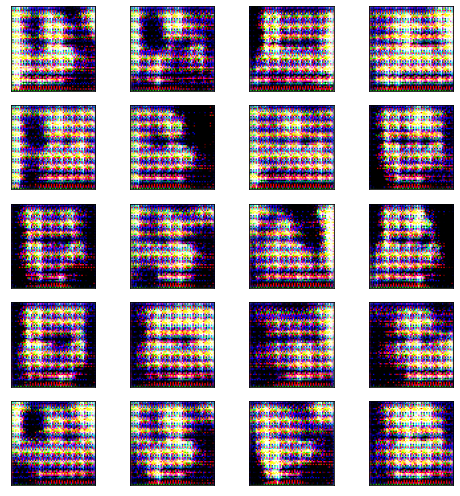

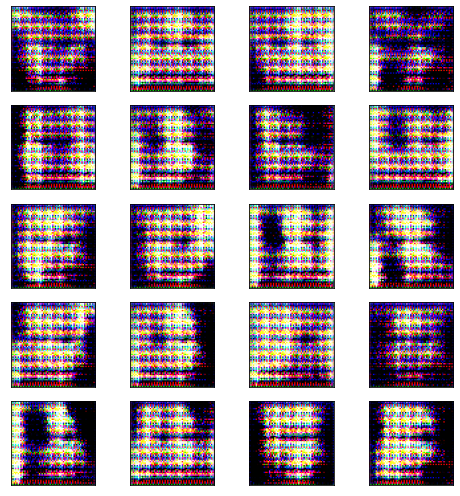

In [36]:
for i in range(5):
 plt.figure(figsize=(7,7))   
 for k in range(20):
            noise=np.random.uniform(-1,1,size=[100,noise_shape])
            im=generator.predict(noise) 
            plt.subplot(5, 4, k+1)
            plt.imshow(im[k].reshape(64,64,3))
            plt.xticks([])
            plt.yticks([])
 
 plt.tight_layout()
 plt.show()
